# Baseball Data Analysis

### Standard Setup Code

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Overview of Statistics in Baseball

Baseball is a sport with no shortage of statistics.  With 32 teams and 162 games a year, the sheer numbers of baseball statistics can be overwhelming.  Add to that, the fact that most actions in baseball are given a concrete numerical value.  Every at-bat for every player is recorded and at each of those at-bats, all of the different actions are recorded.  A player can have a hit, a walk, or an out.  Baseball experts took that even further and the number of bases that a batter advances upon the hit is even recorded.  A double is two bases, for example.  You can start to see the numerous variations of statistics one could calculate on a single player.  And they can be kept for pitching and fielding as well.  We'll attempt to isolate a few of these statisics to find correlations between individual's actions and their team's success.

### Scope of Analysis

The data used in this analysis will be all Major League Baseball teams after the year of 1947 as this is the year that Jackie Robinson broke the color barrier and modernized the game of baseball.

### Limitations of Data

Sacrifice Flies and Hit by Pitches were not recorded until the year 2000.  Zeroes will be assumed for all seasons between 1947 and 1999.

In [3]:
#Load overall team statistics and fill in blanks with zeroes
teams_df = pd.read_csv('baseballdatabank-master\core\Teams.csv')
len(teams_df)
teams_df.fillna(0)

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,0,BS1,BNA,0,3,31,0.0,20,10,...,0.0,0.830,Boston Red Stockings,South End Grounds I,0.0,103,98,BOS,BS1,BS1
1,1871,0,CH1,CNA,0,2,28,0.0,19,9,...,0.0,0.820,Chicago White Stockings,Union Base-Ball Grounds,0.0,104,102,CHI,CH1,CH1
2,1871,0,CL1,CFC,0,8,29,0.0,10,19,...,0.0,0.810,Cleveland Forest Citys,National Association Grounds,0.0,96,100,CLE,CL1,CL1
3,1871,0,FW1,KEK,0,7,19,0.0,7,12,...,0.0,0.800,Fort Wayne Kekiongas,Hamilton Field,0.0,101,107,KEK,FW1,FW1
4,1871,0,NY2,NNA,0,5,33,0.0,16,17,...,0.0,0.830,New York Mutuals,Union Grounds (Brooklyn),0.0,90,88,NYU,NY2,NY2
5,1871,0,PH1,PNA,0,1,28,0.0,21,7,...,0.0,0.840,Philadelphia Athletics,Jefferson Street Grounds,0.0,102,98,ATH,PH1,PH1
6,1871,0,RC1,ROK,0,9,25,0.0,4,21,...,0.0,0.820,Rockford Forest Citys,Agricultural Society Fair Grounds,0.0,97,99,ROK,RC1,RC1
7,1871,0,TRO,TRO,0,6,29,0.0,13,15,...,0.0,0.840,Troy Haymakers,Haymakers' Grounds,0.0,101,100,TRO,TRO,TRO
8,1871,0,WS3,OLY,0,4,32,0.0,15,15,...,0.0,0.850,Washington Olympics,Olympics Grounds,0.0,94,98,OLY,WS3,WS3
9,1872,0,BL1,BLC,0,2,58,0.0,35,19,...,0.0,0.820,Baltimore Canaries,Newington Park,0.0,106,102,BAL,BL1,BL1


In [4]:
#limiting scope of dataset to teams on or after 1947
teams_after_1947_df = teams_df[teams_df.yearID >= 1947]
teams_after_1947_df.fillna(0,inplace=True)
len(teams_after_1947_df)

C:\Users\patri\Anaconda2\lib\site-packages\pandas\core\frame.py:2842: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


1670

## Statistics Relating to a Team's Overall Success

There are three key facets to the game of baseball: 1) the ability to hit the ball, usually resulting in more runs, 2) the ability to limit the other team from hitting the ball, usually resulting in less runs, and 3) the ability to make routine plays in the field even if the ball has been hit.  We will look at one key statistic in each of these areas to evalute which one has the highest correlation to a team's winning percentage.



### Batting as Related to a Team's Success

In this section, we will calculate the team's ability to hit the ball by calculating the team's OPS (On-base plus slugging)

#### Definitions

**On-base percentage (OBP)** = (Hits + Walks + Hit by Pitch) /  (At Bats + Walks + Hit by Pitch + Sacrifice Flies)  

In [5]:
def get_OBP(df):
    OBP = (df['H'] + df['BB'] + df['HBP'])/(df['AB'] + df['BB'] + df['HBP'] + df['SF'])
    return OBP

**Slugging Percentage (SLG)** = (Singles + (2 x Doubles) + (3 X Triples) + (4 * Home Runs)) / At-Bats
OPS = OBP + SLG  

In [6]:
def get_slugging_pct(df):
    slugging_pct=((df['H']-df['2B']-df['3B']-df['HR']) \
               + (2*df['2B']) + (3*df['3B']) + (4*df['HR'])) \
               / (df['AB'])
    return slugging_pct

**OPS** = OBP + SLG

In [59]:
batting_avg = get_slugging_pct(teams_after_1947_df)
on_base_pct = get_OBP(teams_after_1947_df)
OPS = batting_avg + on_base_pct
OPS_BA_df = pd.DataFrame(data={'OPS': OPS, 'BA': teams_after_1947_df['H']/teams_after_1947_df['AB']})

### What is OPS?

Those new to baseball sabermetrics might ask what makes OPS such a good measure of baseball offense and what is a good measure for OPS.  At first, batting average was the measuring stick of a good offense, both individually and as a team.  But those familiar with the sport knew that you needed to account for power, so the calculation of slugging percentage was born which measures that average number of bases a player or team gets per at bat.  With the other important measure being able to get on base, the addition of these two stastics became the new measuring stick.

So what does make a good OPS?  Let's take a look.

In [60]:
OPS_BA_df.describe()

,BA,OPS
count,1670.000000,1670.000000
mean,0.258985,0.721356
std,0.012735,0.045018
min,0.214124,0.578639
25%,0.250408,0.692076
50%,0.259439,0.720552
75%,0.267318,0.749763
max,0.301849,0.850568


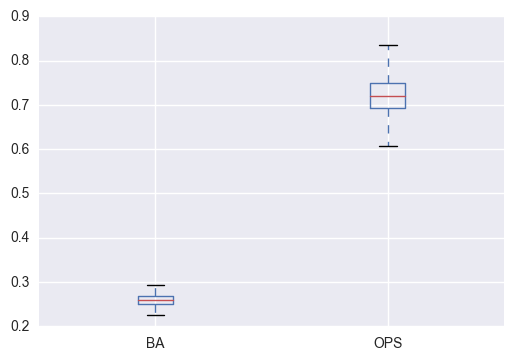

In [64]:
OPS_BA_df.boxplot()

You can see here that OPS has nearly four times the standard deviations as batting average giving us a bigger degree of variation between teams.  The difference between most teams' batting average is not very varied, but when adding in the power variable that OPS provides, you can see the variety start to get larger.

#### Statistical Correlation Between OPS and Wins (Pearson's R)

In [57]:
OPS_W_df = pd.DataFrame(data={'OPS': OPS, 'W': teams_after_1947_df['W']})
print OPS_W_df.corr(method='pearson')['W']['OPS']

0.437578917259


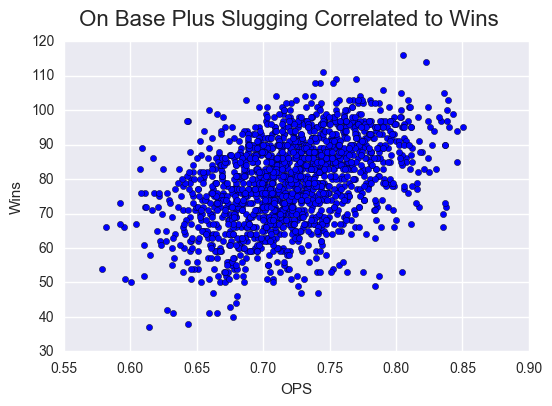

In [79]:
fig = plt.figure()
plt.scatter(OPS,teams_after_1947_df['W'])
fig.suptitle('On Base Plus Slugging Correlated to Wins', fontsize=16)
plt.xlabel('OPS')
plt.ylabel('Wins')

### Pitching as Related to a Team's Success

In this section, we will calculate the team's ability to pitch by calculating the team's WHIP (Walks and Hits Per Inning Pitched)

#### Definitions

**Walks and Hits Per Inning Pitched (WHIP)** = (Walks + Hits) / Inning Pitched

In [23]:
def get_WHIP(df):
    WHIP = (df['BBA'] + df['HA'])/(df['IPouts'] / 3)
    return WHIP

In [24]:
WHIP = get_WHIP(teams_after_1947_df)

#### Statistical Correlation Between WHIP and Wins (Pearson's R)

In [26]:
WHIP_W_df = pd.DataFrame(data={'WHIP': WHIP, 'W': teams_after_1947_df['W']})
print WHIP_W_df.corr(method='pearson')['W']['WHIP']

-0.543845762037


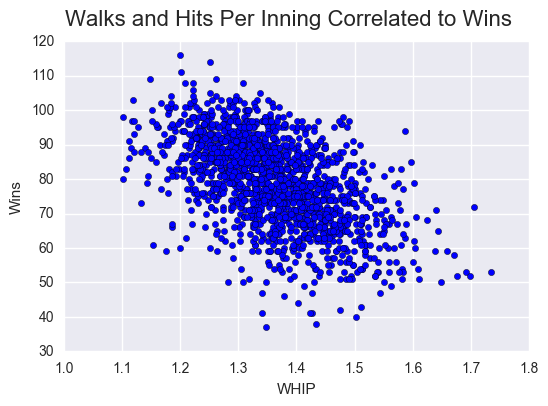

In [81]:
fig = plt.figure()
plt.scatter(WHIP,teams_after_1947_df['W'])
fig.suptitle('Walks and Hits Per Inning Correlated to Wins', fontsize=16)
plt.xlabel('WHIP')
plt.ylabel('Wins')

### Fielding as Related to a Team's Success

In this section, we will use the provided Fielding Percentage (FP)

#### Statistical Correlation Between FP and Wins (Pearson's R)

In [29]:
FP_W_df = pd.DataFrame(data={'FP': teams_after_1947_df['FP'], 'W': teams_after_1947_df['W']})
print FP_W_df.corr(method='pearson')['W']['FP']

0.232048158798


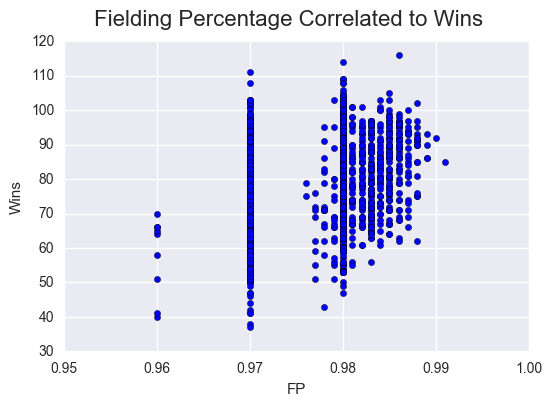

In [83]:
fig = plt.figure()
plt.scatter(teams_after_1947_df['FP'],teams_after_1947_df['W'])
fig.suptitle('Fielding Percentage Correlated to Wins', fontsize=16)
plt.xlabel('FP')
plt.ylabel('Wins')

### Reanalyzing Fielding Percentage

I noticed something awkward about this data when it was visualized.  Most marks fall on the tenth decimal place.  After analyzing the data, I found that FP was kept at only the tenth decimal place until the year 1999 and to the hundredth decimal place after that.

I wanted to analyze the data with the only teams after the year 1999 after seeing this.

In [31]:
#limit only to teams in year 2000 and after
teams_after_2000_df = teams_df[teams_df.yearID >= 2000]
teams_after_2000_df.fillna(0,inplace=True)

In [32]:
FP_W_df = pd.DataFrame(data={'FP': teams_after_2000_df['FP'], 'W': teams_after_2000_df['W']})
print FP_W_df.corr(method='pearson')['W']['FP']

0.371307105324


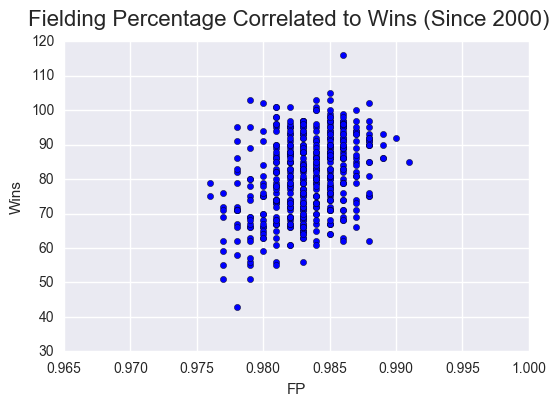

In [85]:
fig = plt.figure()
plt.scatter(teams_after_2000_df['FP'],teams_after_2000_df['W'])
fig.suptitle('Fielding Percentage Correlated to Wins (Since 2000)', fontsize=16)
plt.xlabel('FP')
plt.ylabel('Wins')

### Conclusion

Modern Major League Baseball is known to use advanced statiscal analysis to gain an advantage in a sport that has teams playing 162 games a year needing every little edge possible.  The amount and types of data grow each year as technology is embraced and we tried to use some of those newer statistics to analyze teams over the past 70 years or so.

Using a standard correlation calculation, we wanted to see whether the new baselines of batting, pitching, and fielding statistics correlated with a team's winning percentage.  Between On-Base Plus Slugging (OPS), for batting, Walks and Hits Per Inning Pitches (WHIP), for pitching, and Fielding Percantage (FP), for fielding, WHIP showed the strongest correlation with a team's winning percentage.

So, the old adage is that pitching wins championships seems to hold true?  Not exactly.  For one, we only looked at regular season win totals, so there's no telling if the teams with the highest win percentage won the championship that year as well.  Also, there could be other outside contributing factors as well.  Teams with a low WHIP might have been influenced more by good defense than good pitching, but it is hard to say at this point.